# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [4]:
# loop thru all cities, check if city can be found in openweathermap
# if found, add city to bucket set; if not found, skip and continue
# OpenWeatherMap free account allows 60 calls/min, 
# request 50 cities at a time, wait 55secs then continue loop

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
city_not_found = []
sleep_interval = 0

basket_counter = 1
city_counter = 0

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)
    
    start_time = time.time()
    
    for x in range(len(cities)):

        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                print(query_url)
                logfile.write(process_msg + newline)
                logfile.write(query_url + newline)
                
                if (len(city) % 50) == 0:
                    sleep_interval = time.time() - start_time
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(60 - sleep_interval)
                    start_time = time.time()

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=katsuura&units=imperial
Processing Record 2 of Set 1 | krasnyy luch
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=krasnyy luch&units=imperial
Processing Record 3 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=airai&units=imperial
Processing Record 4 of Set 1 | mutoko
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mutoko&units=imperial
Processing Record 5 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=cape town&units=imperial
Processing Record 6 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hobart&units=imperial
Processing Record 7 of Set 1 

Processing Record 4 of Set 2 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=geraldton&units=imperial
Processing Record 5 of Set 2 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=talcahuano&units=imperial
Processing Record 6 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=albany&units=imperial
Processing Record 7 of Set 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rikitea&units=imperial
Processing Record 8 of Set 2 | soyo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=soyo&units=imperial
Processing Record 9 of Set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=punta arenas&units=imperial
Processing Record 10 of Set 2 | guerrero negro
http://api.openweathermap.org/data/2.5/we

Processing Record 6 of Set 3 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=quatre cocos&units=imperial
Processing Record 7 of Set 3 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kloulklubed&units=imperial
Processing Record 8 of Set 3 | sault sainte marie
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sault sainte marie&units=imperial
Processing Record 9 of Set 3 | hohhot
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hohhot&units=imperial
Processing Record 10 of Set 3 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=severo-kurilsk&units=imperial
City not found... Skipping tumannyy
Processing Record 11 of Set 3 | vytegra
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vytegra&units=imperial
Processing

Processing Record 10 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=iqaluit&units=imperial
Processing Record 11 of Set 4 | sol-iletsk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sol-iletsk&units=imperial
Processing Record 12 of Set 4 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tuktoyaktuk&units=imperial
Processing Record 13 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=khatanga&units=imperial
Processing Record 14 of Set 4 | winkler
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=winkler&units=imperial
Processing Record 15 of Set 4 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vanavara&units=imperial
Processing Record 16 of Set 4 | iquitos
http://api.openweathermap.org/data/2

Processing Record 14 of Set 5 | missoula
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=missoula&units=imperial
City not found... Skipping allanmyo
Processing Record 15 of Set 5 | randolph
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=randolph&units=imperial
Processing Record 16 of Set 5 | sibiti
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sibiti&units=imperial
Processing Record 17 of Set 5 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=salalah&units=imperial
Processing Record 18 of Set 5 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=qaanaaq&units=imperial
Processing Record 19 of Set 5 | guymon
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=guymon&units=imperial
Processing Record 20 of Set 5 | eureka
http://api.openweat

Processing Record 19 of Set 6 | virpur
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=virpur&units=imperial
Processing Record 20 of Set 6 | atasu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=atasu&units=imperial
City not found... Skipping borama
Processing Record 21 of Set 6 | henties bay
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=henties bay&units=imperial
Processing Record 22 of Set 6 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=deputatskiy&units=imperial
Processing Record 23 of Set 6 | bokhan
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bokhan&units=imperial
Processing Record 24 of Set 6 | nizwa
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=nizwa&units=imperial
Processing Record 25 of Set 6 | sola
http://api.openweat

Processing Record 24 of Set 7 | lelystad
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lelystad&units=imperial
Processing Record 25 of Set 7 | asosa
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=asosa&units=imperial
Processing Record 26 of Set 7 | rosetta
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rosetta&units=imperial
Processing Record 27 of Set 7 | gilbues
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=gilbues&units=imperial
Processing Record 28 of Set 7 | dalbandin
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dalbandin&units=imperial
Processing Record 29 of Set 7 | general roca
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=general roca&units=imperial
Processing Record 30 of Set 7 | vardo
http://api.openweathermap.org/data/2.5/weath

Processing Record 27 of Set 8 | broome
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=broome&units=imperial
Processing Record 28 of Set 8 | trapani
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=trapani&units=imperial
Processing Record 29 of Set 8 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=comodoro rivadavia&units=imperial
Processing Record 30 of Set 8 | buxton
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=buxton&units=imperial
Processing Record 31 of Set 8 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=derzhavinsk&units=imperial
Processing Record 32 of Set 8 | tual
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tual&units=imperial
Processing Record 33 of Set 8 | paso de los toros
http://api.openweatherma

Processing Record 29 of Set 9 | kalengwa
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kalengwa&units=imperial
City not found... Skipping amderma
Processing Record 30 of Set 9 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mayo&units=imperial
City not found... Skipping maloshuyka
Processing Record 31 of Set 9 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dunedin&units=imperial
Processing Record 32 of Set 9 | marathon
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=marathon&units=imperial
Processing Record 33 of Set 9 | palanga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=palanga&units=imperial
Processing Record 34 of Set 9 | spokane
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=spokane&units=imperial
Processing Record 35 of

Processing Record 32 of Set 10 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hasaki&units=imperial
Processing Record 33 of Set 10 | butajira
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=butajira&units=imperial
Processing Record 34 of Set 10 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=batagay-alyta&units=imperial
Processing Record 35 of Set 10 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hofn&units=imperial
Processing Record 36 of Set 10 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kangaatsiaq&units=imperial
Processing Record 37 of Set 10 | daru
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=daru&units=imperial
Processing Record 38 of Set 10 | shibetsu
http://api.openweathermap.org/data/2.5

Processing Record 35 of Set 11 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=olafsvik&units=imperial
Processing Record 36 of Set 11 | visnes
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=visnes&units=imperial
Processing Record 37 of Set 11 | severnyy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=severnyy&units=imperial
Processing Record 38 of Set 11 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=aklavik&units=imperial
Processing Record 39 of Set 11 | praia
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=praia&units=imperial
Processing Record 40 of Set 11 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=plettenberg bay&units=imperial
Processing Record 41 of Set 11 | kumylzhenskaya
http://api.openweathermap.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create city data frame
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [6]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=True)

In [7]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,75,JP,1604375241,88,35.13,140.30,62.60,9.17
1,Krasnyy Luch,100,UA,1604375241,97,48.14,38.94,47.44,4.16
2,Airai,96,TL,1604375241,37,-8.93,125.41,81.93,4.09
3,Mutoko,1,ZW,1604375241,75,-17.40,32.23,64.17,3.56
4,Cape Town,0,ZA,1604375076,87,-33.93,18.42,64.00,5.82
...,...,...,...,...,...,...,...,...,...
570,Verkhnevilyuysk,100,RU,1604375903,86,63.45,120.32,10.58,7.02
571,Dudinka,40,RU,1604375903,85,69.41,86.18,10.40,2.24
572,Hualmay,31,PE,1604375903,86,-11.10,-77.61,59.72,4.34
573,Hengshui,0,CN,1604375904,29,37.73,115.70,55.99,6.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

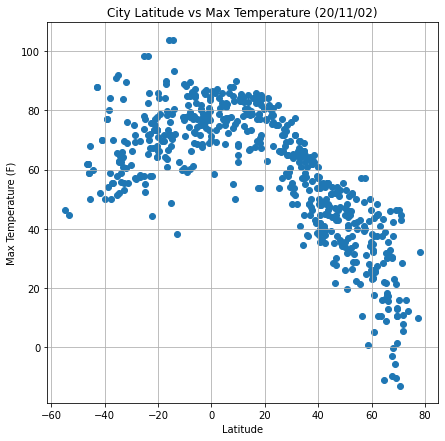

In [8]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_lat = city_df['Lat']
y_temp = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_lat, y_temp)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

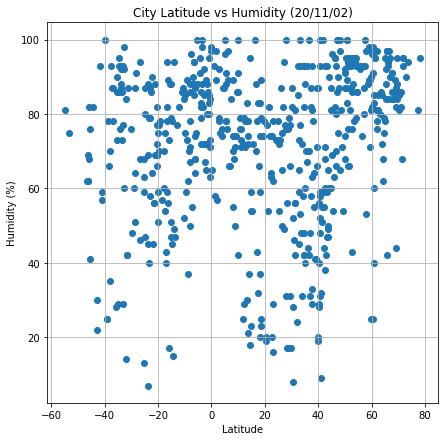

In [9]:
y_hum = city_df["Humidity"]

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

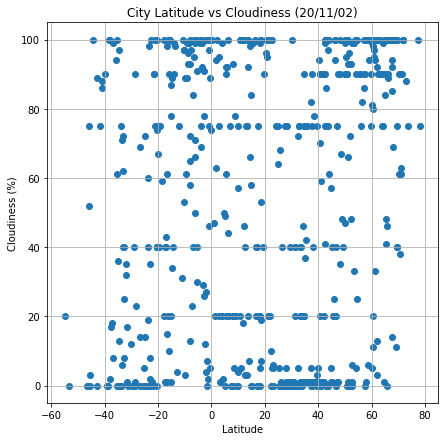

In [10]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

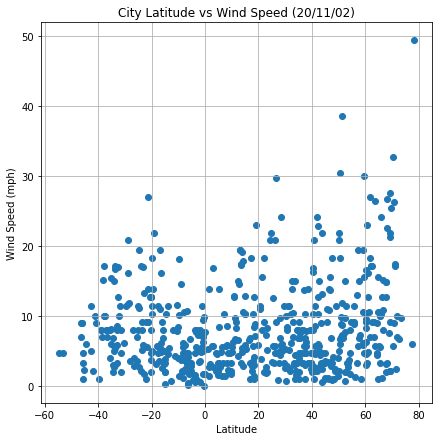

In [11]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)